In [18]:
#Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Study data files
olympic_data_path = "athlete_events.csv"

# Read the mouse data and the study results
olympic_data = pd.read_csv(olympic_data_path)

olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#create subset of data from 1970 to 2016 
olympic_data_subset = olympic_data[(olympic_data['Year'] >= 1970) & (olympic_data['Year'] <= 2016)]

olympic_data_subset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#Find how many athletes per year (for reference)
athletes_by_year = olympic_data_subset.groupby(['Year', 'Sex']).size().reset_index(name='count')
athletes_by_year.head()

,Year,Sex,count
0,1972,F,2608
1,1972,M,9351
2,1976,F,2606
3,1976,M,7896
4,1980,F,2186


In [6]:
#Find number of Male and Female per year 
male_data = olympic_data_subset[olympic_data_subset['Sex'] == 'M']
female_data = olympic_data_subset[olympic_data_subset['Sex'] == 'F']

#Group by year 
male_count_by_year = male_data.groupby('Year').size().reset_index(name='Male_Count')
female_count_by_year = female_data.groupby('Year').size().reset_index(name='Female_Count')

#Create one subdata set
merged_counts_by_year = pd.merge(male_count_by_year, female_count_by_year, on='Year', how='outer')

merged_counts_by_year.head()


,Year,Male_Count,Female_Count
0,1972,9351,2608
1,1976,7896,2606
2,1980,6751,2186
3,1984,8605,2983
4,1988,10453,4223


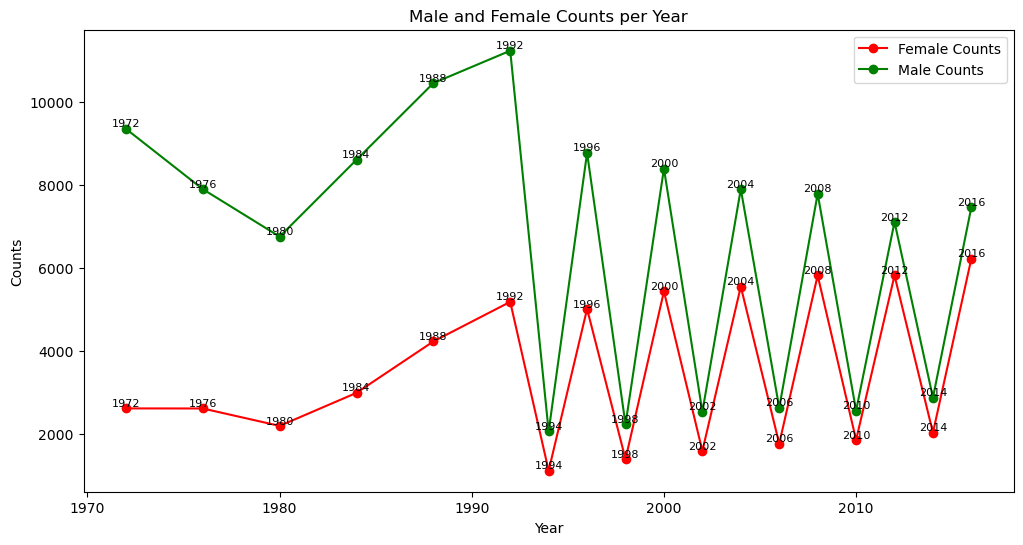

In [7]:
#Create line graph 
plt.figure(figsize=(12, 6))
plt.plot(merged_counts_by_year['Year'], 
         merged_counts_by_year['Female_Count'], 
         marker='o', 
         color = 'red',
         label='Female Counts')
plt.plot(merged_counts_by_year['Year'], 
         merged_counts_by_year['Male_Count'], 
         marker='o', 
         color = 'green',
         label='Male Counts')

for i, year in enumerate(merged_counts_by_year['Year']):
    plt.text(merged_counts_by_year['Year'][i], merged_counts_by_year['Female_Count'][i], str(year), ha='center', va='bottom', fontsize=8)
    plt.text(merged_counts_by_year['Year'][i], merged_counts_by_year['Male_Count'][i], str(year), ha='center', va='bottom', fontsize=8)

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Male and Female Counts per Year')
plt.legend()

plt.show();


In [8]:
# Filter rows where the Year is greater than or equal to 1994
filtered_subset = olympic_data_subset[olympic_data_subset['Year'] >= 1994]

# Separate out by summer and winter games after 1994
subset_years = filtered_subset['Year']
subset_seasons = filtered_subset['Season']

# Lists to store subsequent years for winter and summer games
winter_subsequent_years = []
summer_subsequent_years = []

# Go through each row 
for i in range(len(filtered_subset) - 1):
    current_year = subset_years.iloc[i]
    current_season = subset_seasons.iloc[i]

    # Identify subsequent winter years
    if current_season == 'Winter' and subset_seasons.iloc[i + 1] == 'Winter':
        if subset_years.iloc[i + 1] not in winter_subsequent_years:
            winter_subsequent_years.append(subset_years.iloc[i + 1])

    # Identify subsequent summer years
    elif current_season == 'Summer' and subset_seasons.iloc[i + 1] == 'Summer':
        if subset_years.iloc[i + 1] not in summer_subsequent_years:
            summer_subsequent_years.append(subset_years.iloc[i + 1])

print(f"Winter Olympic years are {winter_subsequent_years}")
print(f"Summer Olympic years are {summer_subsequent_years}")


Winter Olympic years are [1994, 2002, 2014, 1998, 2006, 2010]
Summer Olympic years are [1996, 2000, 2016, 2004, 2012, 2008]


In [9]:
# Male and Female Counts in the specific winter years
# Filtered subset with identified years groups by M and F
male_data_subyears = filtered_subset[filtered_subset['Sex'] == 'M']
female_data_subyears = filtered_subset[filtered_subset['Sex'] == 'F']

# Group by years in subset for males and females
male_count_year_subset = male_data_subyears.groupby('Year').size().reset_index(name='Male_Count')
female_count_year_subset = female_data_subyears.groupby('Year').size().reset_index(name='Female_Count')

# Subsetting male and female counts by identified winter and summer years
winter_male_counts = male_count_year_subset[male_count_year_subset['Year'].isin(winter_subsequent_years)]
winter_female_counts = female_count_year_subset[female_count_year_subset['Year'].isin(winter_subsequent_years)]

summer_male_counts = male_count_year_subset[male_count_year_subset['Year'].isin(summer_subsequent_years)]
summer_female_counts = female_count_year_subset[female_count_year_subset['Year'].isin(summer_subsequent_years)]



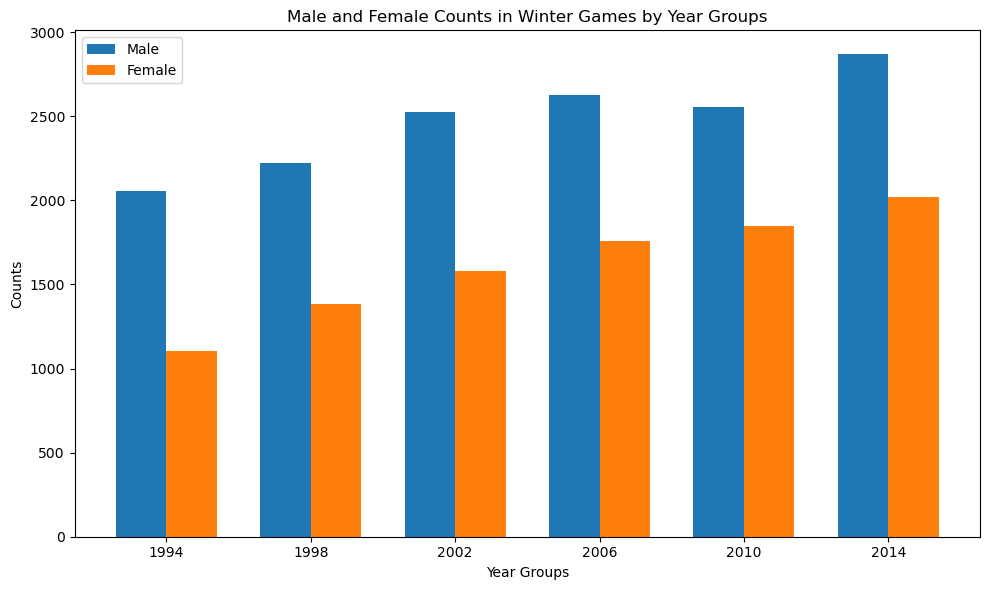

In [10]:
#Graph thw Winter games in side by side bar to show comparison 
#Combine male and female counts for winter games into a single DataFrame for plotting
combined_winter_counts = winter_male_counts.merge(winter_female_counts, on='Year', suffixes=('_Male', '_Female'))

#identifying data for plotting
years = combined_winter_counts['Year']
male_counts = combined_winter_counts['Male_Count']
female_counts = combined_winter_counts['Female_Count']

# Width of each bar
bar_width = 0.35

# Generating positions for bars
index = np.arange(len(years))

# Creating the bar plot
plt.figure(figsize=(10, 6))

plt.bar(index, male_counts, 
        bar_width, 
        label='Male')
plt.bar(index + bar_width, 
        female_counts, 
        bar_width, 
        label='Female')

plt.xlabel('Year Groups')
plt.ylabel('Counts')
plt.title('Male and Female Counts in Winter Games by Year Groups')
plt.xticks(index + bar_width / 2, years)
plt.legend()

plt.tight_layout()
plt.show();

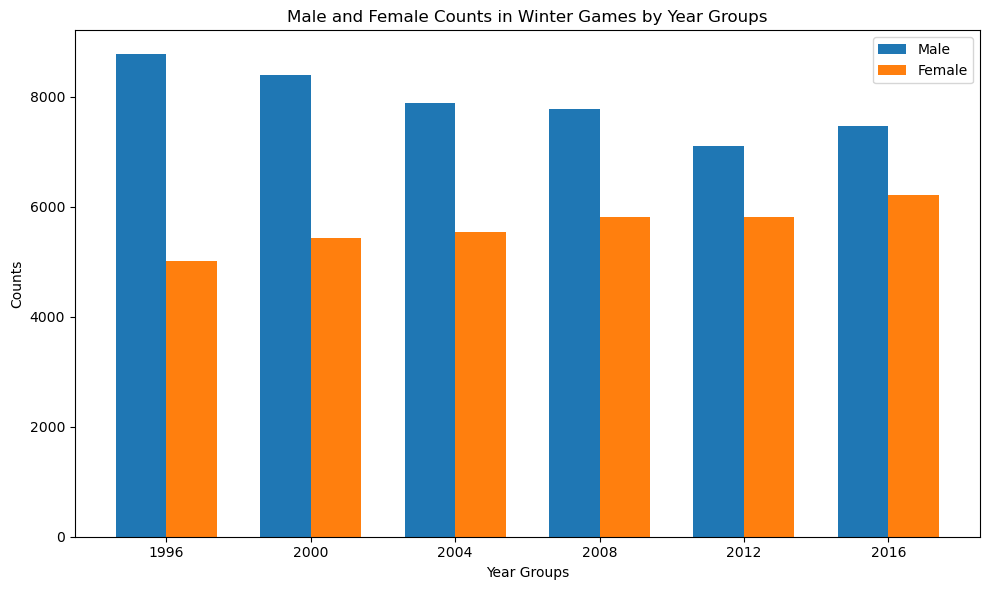

In [11]:
#Graph thw Winter games in side by side bar to show comparison 
#Combine male and female counts for winter games into a single DataFrame for plotting
combined_summer_counts = summer_male_counts.merge(summer_female_counts, on='Year', suffixes=('_Male', '_Female'))

#identifying data for plotting
years = combined_summer_counts['Year']
male_counts = combined_summer_counts['Male_Count']
female_counts = combined_summer_counts['Female_Count']

# Width of each bar
bar_width = 0.35

# Generating positions for bars
index = np.arange(len(years))

# Creating the bar plot
plt.figure(figsize=(10, 6))

plt.bar(index, male_counts, 
        bar_width, 
        label='Male')
plt.bar(index + bar_width, 
        female_counts, 
        bar_width, 
        label='Female')

plt.xlabel('Year Groups')
plt.ylabel('Counts')
plt.title('Male and Female Counts in Winter Games by Year Groups')
plt.xticks(index + bar_width / 2, years)
plt.legend()

plt.tight_layout()
plt.show();

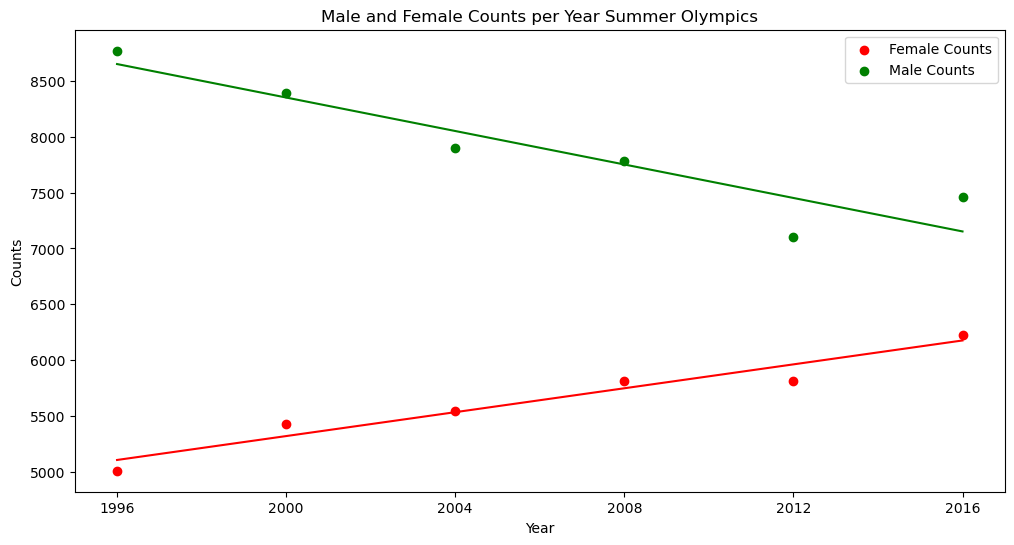

In [21]:
#Overlay scatterplots 
plt.figure(figsize=(12, 6))

plt.scatter(summer_female_counts['Year'], 
            summer_female_counts['Female_Count'], 
            color='red',
            label='Female Counts')
plt.scatter(summer_male_counts['Year'], 
            summer_male_counts['Male_Count'], 
            color='green',
            label='Male Counts')

female_regression = LinearRegression()
female_regression.fit(summer_female_counts[['Year']], summer_female_counts['Female_Count'])
plt.plot(summer_female_counts['Year'], female_regression.predict(summer_female_counts[['Year']]), color='red')

male_regression = LinearRegression()
male_regression.fit(summer_male_counts[['Year']], summer_male_counts['Male_Count'])
plt.plot(summer_male_counts['Year'], male_regression.predict(summer_male_counts[['Year']]), color='green')

plt.xticks(summer_female_counts['Year'])
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Male and Female Counts per Year Summer Olympics')
plt.legend()

plt.show();

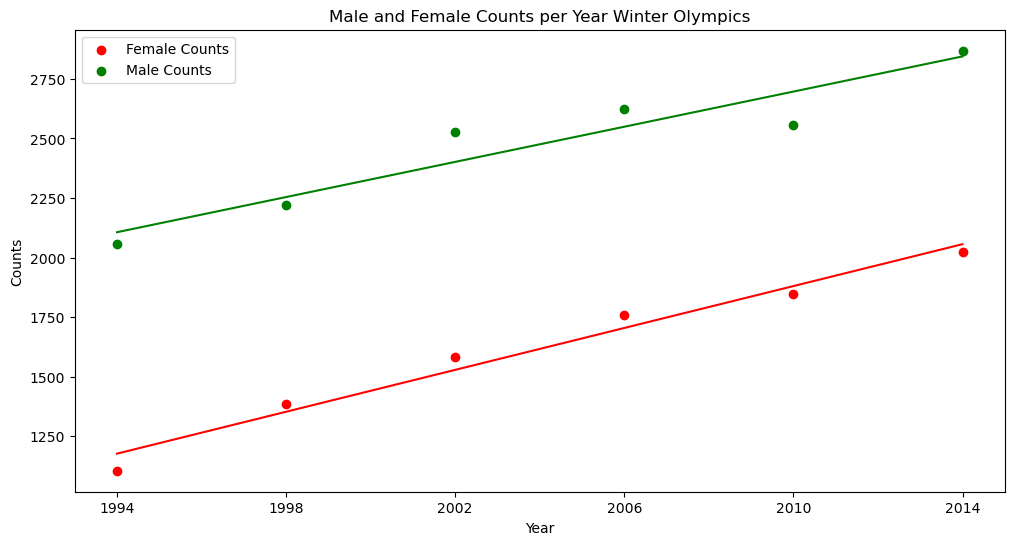

In [22]:
 #Overlay scatterplots 
plt.figure(figsize=(12, 6))

plt.scatter(winter_female_counts['Year'], 
            winter_female_counts['Female_Count'], 
            color='red',
            label='Female Counts')
plt.scatter(winter_male_counts['Year'], 
            winter_male_counts['Male_Count'], 
            color='green',
            label='Male Counts')

female_regression = LinearRegression()
female_regression.fit(winter_female_counts[['Year']], winter_female_counts['Female_Count'])
plt.plot(winter_female_counts['Year'], female_regression.predict(winter_female_counts[['Year']]), color='red')

male_regression = LinearRegression()
male_regression.fit(winter_male_counts[['Year']], winter_male_counts['Male_Count'])
plt.plot(winter_male_counts['Year'], male_regression.predict(winter_male_counts[['Year']]), color='green')

plt.xticks(winter_female_counts['Year'])
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Male and Female Counts per Year Winter Olympics')
plt.legend()

plt.show();